Gina
Question:
How does a players age, height and weight correlate with their performance? Do players of different positions peak at different ages?
Reason ask this questions:


Performance being defined by following key performance indicators:

Points (PTS)
Rebounds (REB)
Assists (AST)
Steals (STL)
Blocks (BLK)
Turnovers (TOV)
True Shooting Pecentage (TS%)
Player Efficiency Rating (PER)

Analysis & Visualization Techniques:
Normal test
Scatter plots
Regression equation
gmaps


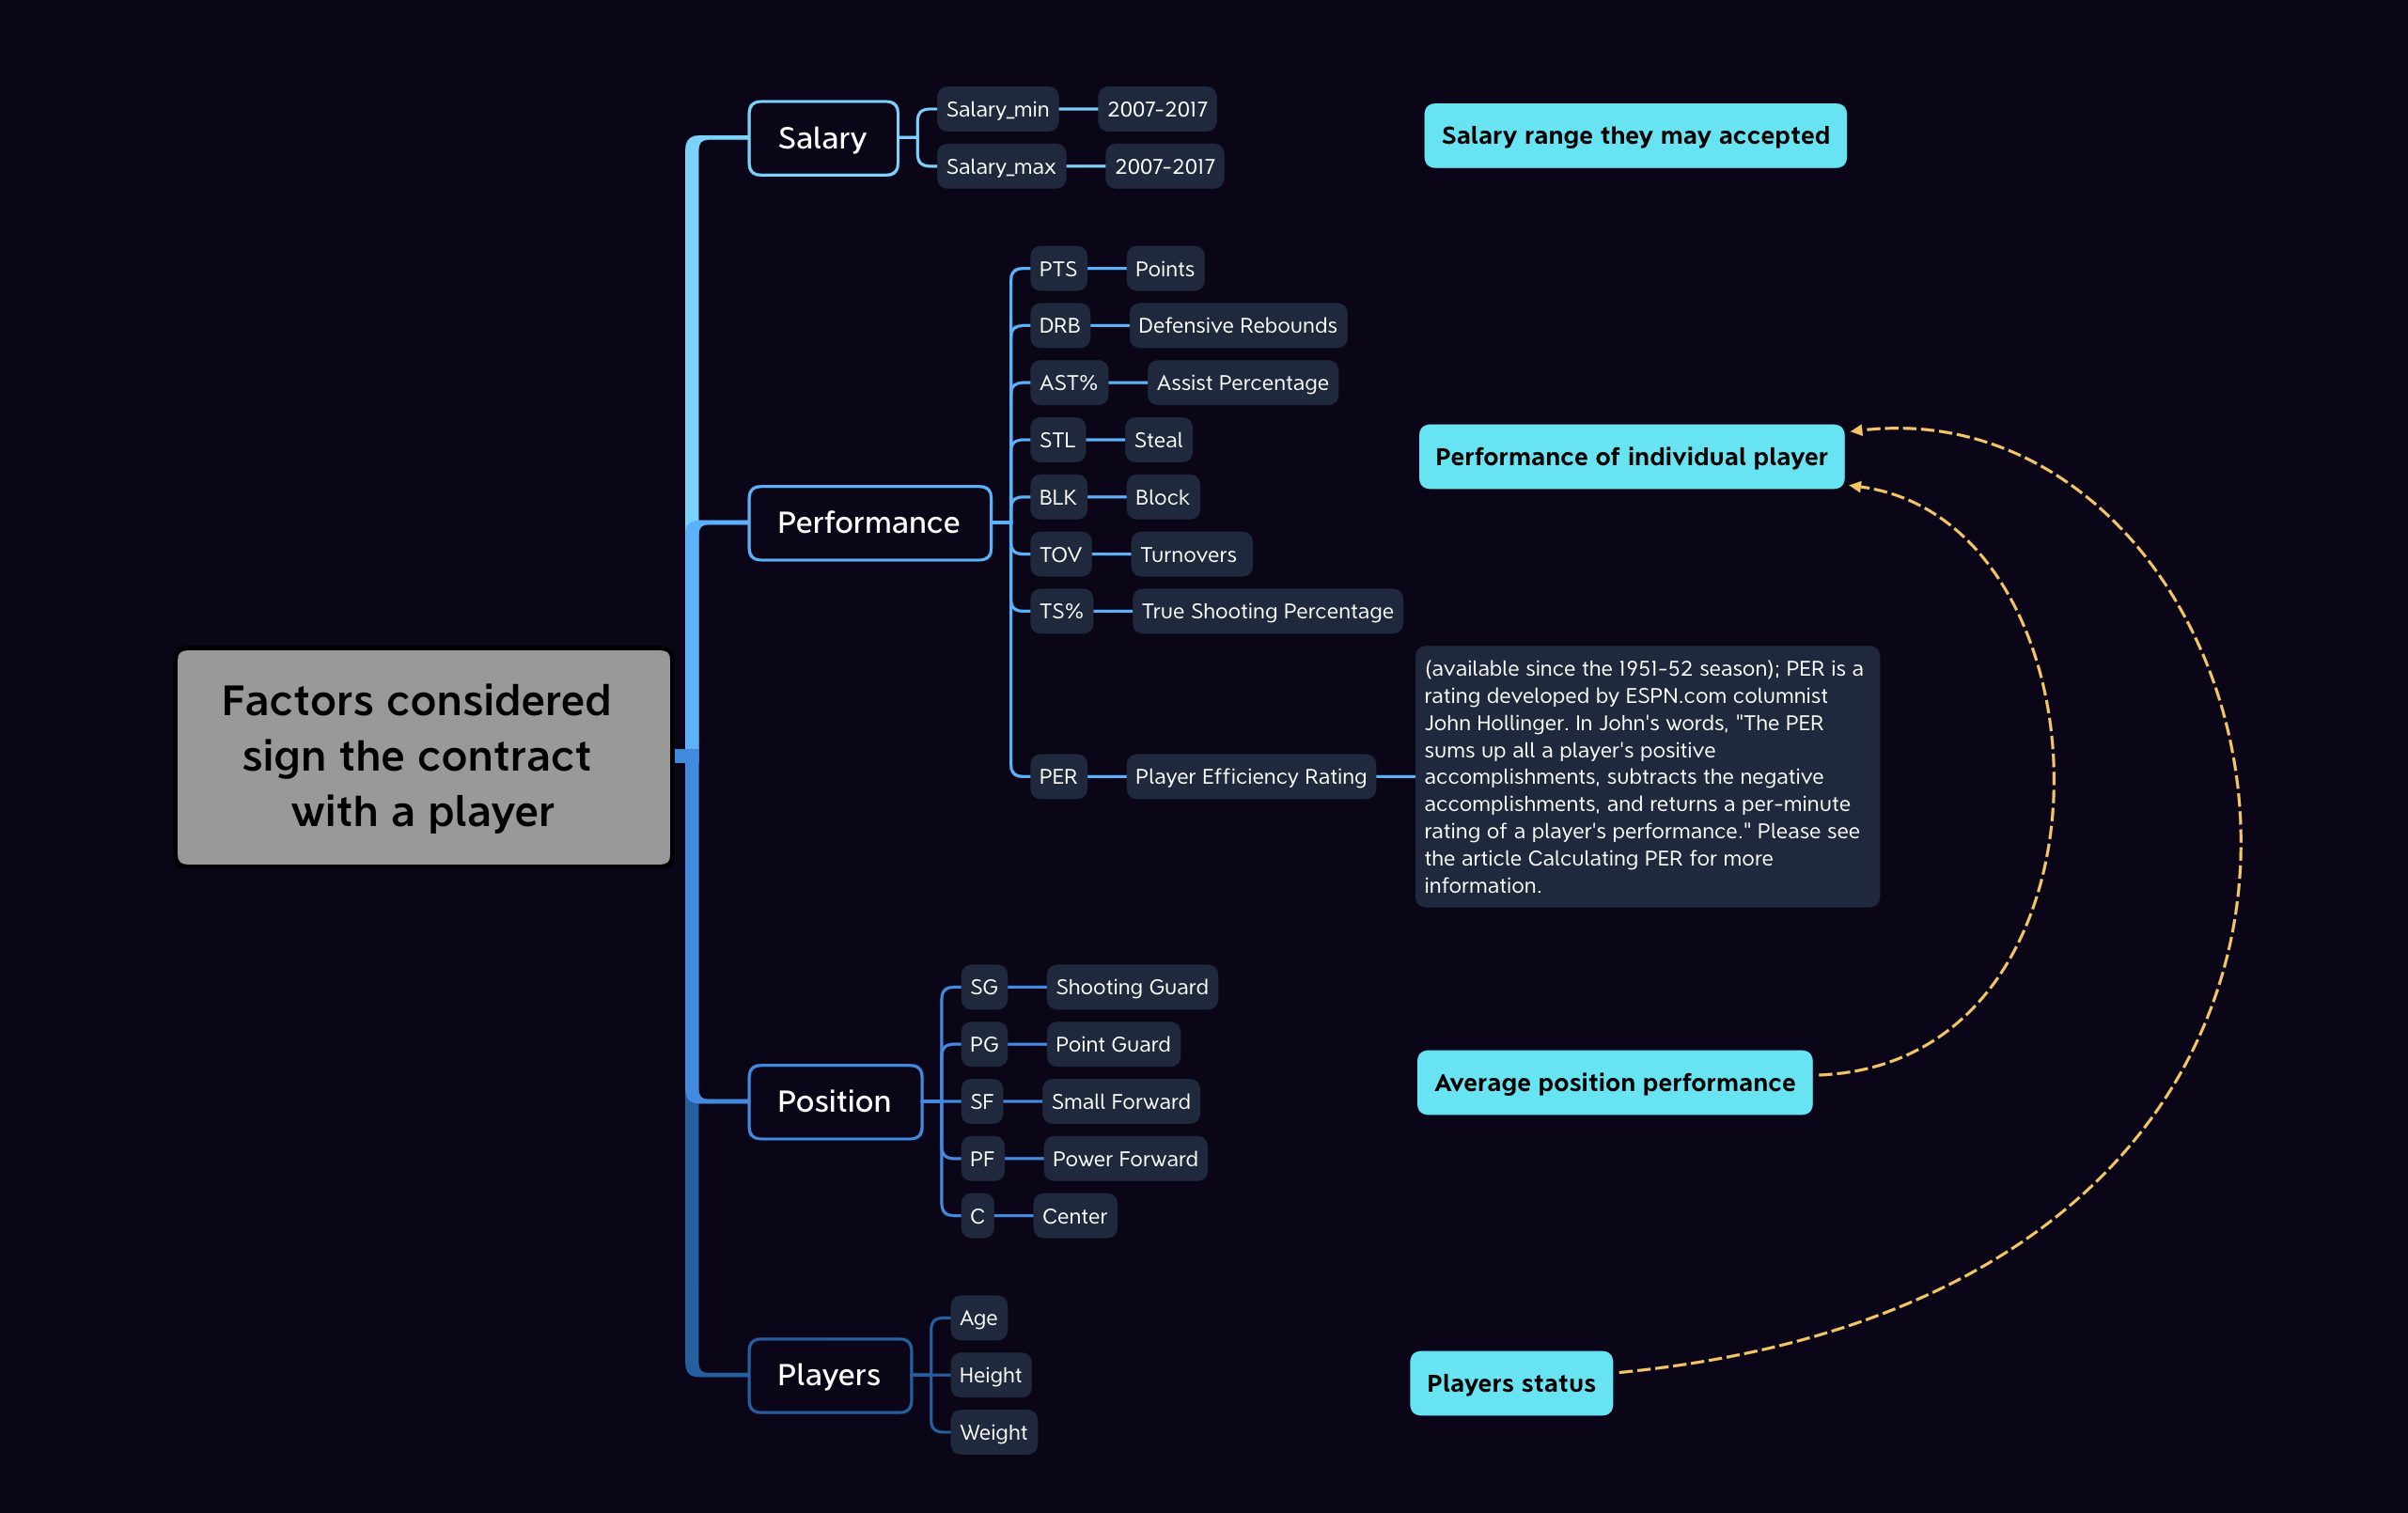



In [1]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import sklearn.datasets as dta

import matplotlib.pyplot as plt

In [2]:
# Read the original data files
stats_path = "../data/stats.csv"
salaries_path = "../data/salaries.csv"
demographics_path = "../data/demographics.csv"

stats_original_df = pd.read_csv(stats_path)
salaries_original_df = pd.read_csv(salaries_path)
demographics_df = pd.read_csv(demographics_path)
salaries_original_df.head()

,Unnamed: 0,Unnamed: 0.1,register_value,name,Salary in $,season_start,season_end,team,full_team_name
0,0,0,10717.0,A.J. Hammons,"$650,000.00",2016.0,2017.0,DAL,Dallas Mavericks
1,1,1,11326.0,A.J. Hammons,"$1,312,611.00",2017.0,2018.0,MIA,Miami Heat
2,2,2,7486.0,A.J. Price,"$457,588.00",2009.0,2010.0,IND,Indiana Pacers
3,3,3,7944.0,A.J. Price,"$762,195.00",2010.0,2011.0,IND,Indiana Pacers
4,4,4,8348.0,A.J. Price,"$854,389.00",2011.0,2012.0,IND,Indiana Pacers


In [3]:
# Set salary data type
salaries_original_df[' Salary in $ '] = salaries_original_df[' Salary in $ '].str.replace('$', '')
salaries_original_df[' Salary in $ '] = salaries_original_df[' Salary in $ '].str.replace(',', '')
salaries_original_df[' Salary in $ '] = salaries_original_df[' Salary in $ '].astype(float)
salaries_original_df.head()

,Unnamed: 0,Unnamed: 0.1,register_value,name,Salary in $,season_start,season_end,team,full_team_name
0,0,0,10717.0,A.J. Hammons,650000.0,2016.0,2017.0,DAL,Dallas Mavericks
1,1,1,11326.0,A.J. Hammons,1312611.0,2017.0,2018.0,MIA,Miami Heat
2,2,2,7486.0,A.J. Price,457588.0,2009.0,2010.0,IND,Indiana Pacers
3,3,3,7944.0,A.J. Price,762195.0,2010.0,2011.0,IND,Indiana Pacers
4,4,4,8348.0,A.J. Price,854389.0,2011.0,2012.0,IND,Indiana Pacers


In [4]:
# Restructure salaties dataframe
salaries_original_df = salaries_original_df.rename(columns={" Salary in $ ": "Salary", "season_end": "Year"})
salaries_df = salaries_original_df[["name","Salary","Year","team"]]
salaries_df.head()

,name,Salary,Year,team
0,A.J. Hammons,650000.0,2017.0,DAL
1,A.J. Hammons,1312611.0,2018.0,MIA
2,A.J. Price,457588.0,2010.0,IND
3,A.J. Price,762195.0,2011.0,IND
4,A.J. Price,854389.0,2012.0,IND


In [5]:
# Filter the KPIs we need for player's performance
performance_df = stats_original_df[["year","player","pos","age","team","PTS","DRB","AST%","STL","BLK","TOV","TS%","PER"]]
performance_df.head()

,year,player,pos,age,team,PTS,DRB,AST%,STL,BLK,TOV,TS%,PER
0,2007,Shareef Abdur-Rahim,C,30,SAC,793,276,9.2,53,40,116,0.524,13.1
1,2007,Hassan Adams,SG,22,NJN,174,42,4.5,17,4,22,0.577,13.0
2,2007,Maurice Ager,SG,22,DAL,69,20,5.0,4,3,15,0.408,2.9
3,2007,LaMarcus Aldridge,C,21,POR,565,168,3.2,22,73,43,0.533,17.1
4,2007,Malik Allen,PF,28,CHI,242,77,4.2,17,16,21,0.443,10.4


In [6]:
# Drop useless columns from demographics df
demographics_df = demographics_df.drop(columns=["collage"])
demographics_df.head()

,Unnamed: 0,name,height,weight,born,birth_city,birth_state
0,0,Al Harrington,206,104,1980,Orange,New Jersey
1,1,J.R. Henderson,206,104,1980,NaN,NaN
2,2,Bruno Sundov,218,99,1980,Split,Croatia
3,3,Jonathan Bender,211,91,1981,Picayune,Mississippi
4,4,Dalibor Bagaric,216,115,1980,Croatia,NaN


In [7]:
# Combine salaries df with performance df
combined_df = pd.merge(performance_df,salaries_df, how = "inner", left_on=["player","year"],right_on =["name","Year"])
combined_df = combined_df.drop(columns = ["name","Year","team_y"])
combined_df = combined_df.rename(columns ={"team_x":"team"})
combined_df.head()

,year,player,pos,age,team,PTS,DRB,AST%,STL,BLK,TOV,TS%,PER,Salary
0,2008,Arron Afflalo,SG,22,DET,276,101,8.1,31,8,34,0.494,10.2,944520.0
1,2008,Maurice Ager,SG,23,TOT,51,9,8.0,0,1,6,0.363,1.8,974400.0
2,2008,Maurice Ager,SG,23,DAL,15,3,7.4,0,1,3,0.253,-4.4,974400.0
3,2008,Maurice Ager,SG,23,NJN,36,6,8.4,0,0,3,0.443,7.1,974400.0
4,2008,LaMarcus Aldridge,PF,22,POR,1350,358,8.8,55,94,126,0.523,18.5,4329360.0


In [8]:
# Merge the demographic df with combined df
cleaned_df = pd.merge(combined_df,demographics_df, how = "inner", left_on="player",right_on ="name")
cleaned_df = cleaned_df.drop(columns=["name"])
cleaned_df.head()

,year,player,pos,age,team,PTS,DRB,AST%,STL,BLK,TOV,TS%,PER,Salary,Unnamed: 0,height,weight,born,birth_city,birth_state
0,2008,Arron Afflalo,SG,22,DET,276,101,8.1,31,8,34,0.494,10.2,944520.0,307,196,95,1985,Los Angeles,California
1,2009,Arron Afflalo,SG,23,DET,363,104,5.5,28,13,43,0.548,8.9,1015440.0,307,196,95,1985,Los Angeles,California
2,2010,Arron Afflalo,SG,24,DEN,724,193,9.3,46,30,74,0.576,10.9,1086240.0,307,196,95,1985,Los Angeles,California
3,2011,Arron Afflalo,SG,25,DEN,867,206,10.9,34,31,71,0.620,13.6,1959577.0,307,196,95,1985,Los Angeles,California
4,2012,Arron Afflalo,SG,26,DEN,943,157,11.1,36,13,85,0.584,14.7,7562500.0,307,196,95,1985,Los Angeles,California


In [9]:
cleaned_df = cleaned_df.dropna()
cleaned_df.count()

year           4118
player         4118
pos            4118
age            4118
team           4118
PTS            4118
DRB            4118
AST%           4118
STL            4118
BLK            4118
TOV            4118
TS%            4118
PER            4118
Salary         4118
Unnamed: 0     4118
height         4118
weight         4118
born           4118
birth_city     4118
birth_state    4118
dtype: int64

In [10]:
cleaned_df["pos"].value_counts()

PG       874
SG       838
PF       832
SF       760
C        754
PG-SG     12
SG-PG      9
PF-SF      8
SF-SG      7
SF-PF      7
C-PF       6
SG-SF      5
PF-C       5
SG-PF      1
Name: pos, dtype: int64

In [11]:
cleaned_df["pos"] = cleaned_df["pos"].replace({
    "PG-SG":"PG",
    "SG-PG":"SG",
    "PF-SF":"PF",
    "SF-PF":"SF",
    "SF-SG":"SF",
    "C-PF":"C",
    "PF-C":"PF",
    "SG-SF":"SG",
    "SG-PF":"SG"
})
cleaned_df["pos"].value_counts()

PG    886
SG    853
PF    845
SF    774
C     760
Name: pos, dtype: int64

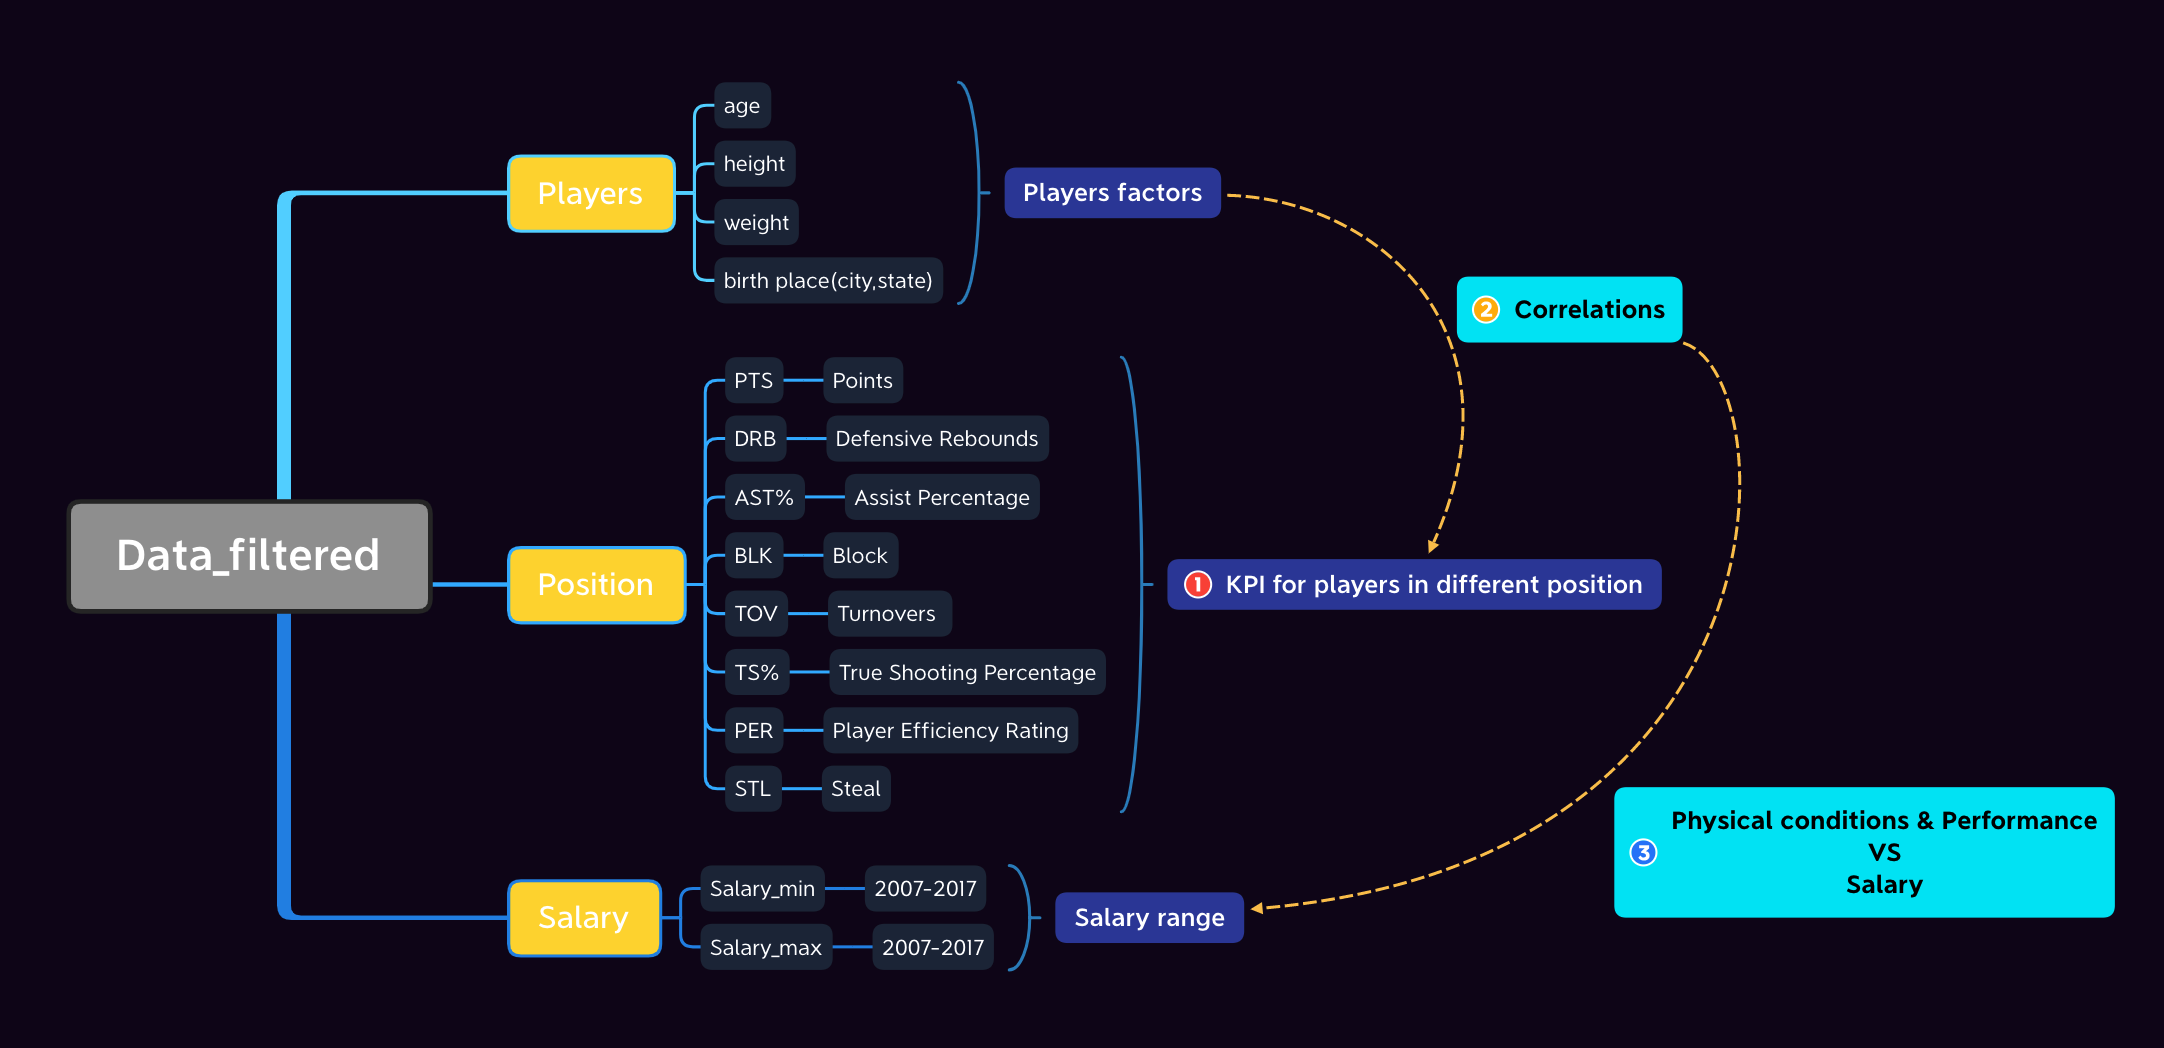

In [12]:
# Push the cleaned DataFrame to a new CSV file
cleaned_df.to_csv("Output/player_matrix.csv",
                  encoding="utf-8", index=False, header=True)
# Read the CSV file
player_matrix = pd.read_csv("Output/player_matrix.csv")
player_matrix["TS%"]=player_matrix["TS%"]*100
player_matrix.head()

,year,player,pos,age,team,PTS,DRB,AST%,STL,BLK,TOV,TS%,PER,Salary,Unnamed: 0,height,weight,born,birth_city,birth_state
0,2008,Arron Afflalo,SG,22,DET,276,101,8.1,31,8,34,49.4,10.2,944520.0,307,196,95,1985,Los Angeles,California
1,2009,Arron Afflalo,SG,23,DET,363,104,5.5,28,13,43,54.8,8.9,1015440.0,307,196,95,1985,Los Angeles,California
2,2010,Arron Afflalo,SG,24,DEN,724,193,9.3,46,30,74,57.6,10.9,1086240.0,307,196,95,1985,Los Angeles,California
3,2011,Arron Afflalo,SG,25,DEN,867,206,10.9,34,31,71,62.0,13.6,1959577.0,307,196,95,1985,Los Angeles,California
4,2012,Arron Afflalo,SG,26,DEN,943,157,11.1,36,13,85,58.4,14.7,7562500.0,307,196,95,1985,Los Angeles,California


In [13]:
# KPI for players in different position
player_pos_grouped = player_matrix[["pos","age","PTS","DRB","AST%","STL","BLK","TOV","TS%","PER","Salary"]].groupby(["pos"])
performance_median = round(player_pos_grouped.median(),2).head()
performance_median

,age,PTS,DRB,AST%,STL,BLK,TOV,TS%,PER,Salary
pos,,,,,,,,,,
C,25.0,298.5,161.5,6.25,19.5,34.0,48.0,54.15,14.75,3000000.0
PF,25.0,290.0,132.0,7.00,21.0,18.0,39.0,52.60,13.80,2678000.0
PG,25.0,316.0,72.5,24.60,31.0,5.0,61.0,50.80,12.50,1957784.5
SF,25.0,316.0,107.0,8.60,27.5,11.0,41.0,52.05,11.70,2250000.0
SG,25.0,306.0,81.0,11.10,26.0,6.0,41.0,51.70,11.50,1602960.0


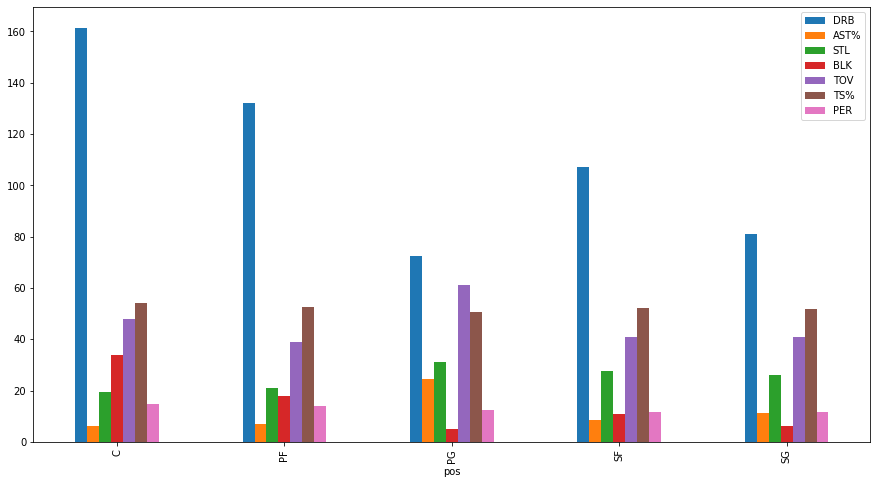

<Figure size 432x288 with 0 Axes>

In [15]:
# group by pos and sort by salary, hope can sort each
performance_metrix = performance_median[["DRB","AST%","STL","BLK","TOV","TS%","PER"]]
multi_plot = performance_metrix.plot(kind="bar", figsize=(15,8))
plt.show()
plt.tight_layout()

In [16]:
# Check each position correlation between PER and other matrix
position = input(f"Which position data are you looking for? (C,PF,PG,SF,SG)")
position_data = player_matrix.loc[player_matrix["pos"]==position,["pos",
                                                                  "PTS","DRB","AST%","STL","BLK","TOV","TS%","PER"]]

Which position data are you looking for? (C,PF,PG,SF,SG)C


In [17]:
position_data.head()

,pos,PTS,DRB,AST%,STL,BLK,TOV,TS%,PER
42,C,218,126,1.3,20,109,45,54.6,10.2
43,C,219,150,1.0,36,84,45,59.8,10.3
44,C,87,70,3.1,13,42,22,54.2,10.4
45,C,28,23,1.6,3,12,3,39.4,8.1
46,C,6,5,0.0,0,4,1,43.6,8.0



## *Check the corr between PER and other 7 metrix*

In [18]:
position_corr = position_data.corr()
position_corr.unstack().sort_values()

TS%   AST%    0.060922
AST%  TS%     0.060922
      BLK     0.125259
BLK   AST%    0.125259
STL   TS%     0.237024
                ...   
      STL     1.000000
AST%  AST%    1.000000
DRB   DRB     1.000000
TS%   TS%     1.000000
PER   PER     1.000000
Length: 64, dtype: float64

In [19]:
# Input the metrix wish to compare with PER
metrix = input(f"Which metrix do you want to compare with PER? (PTS,DRB,AST%,STL,BLK,TOV,TS%)")

Which metrix do you want to compare with PER? (PTS,DRB,AST%,STL,BLK,TOV,TS%)PTS


The r-squared is: 0.37945191296118186


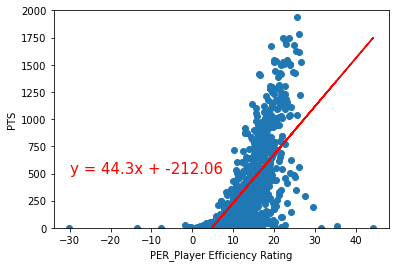

In [20]:
# Add the linear regression equation and line to scatter plot
from scipy.stats import linregress
x_values = position_data["PER"]
y_values = position_data[metrix]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,500),fontsize=15,color="red")
plt.xlabel('PER_Player Efficiency Rating')
plt.ylabel(metrix)
print(f"The r-squared is: {rvalue**2}")
plt.ylim(0, 2000)
plt.show()

In [21]:
position_data.head()

,pos,PTS,DRB,AST%,STL,BLK,TOV,TS%,PER
42,C,218,126,1.3,20,109,45,54.6,10.2
43,C,219,150,1.0,36,84,45,59.8,10.3
44,C,87,70,3.1,13,42,22,54.2,10.4
45,C,28,23,1.6,3,12,3,39.4,8.1
46,C,6,5,0.0,0,4,1,43.6,8.0


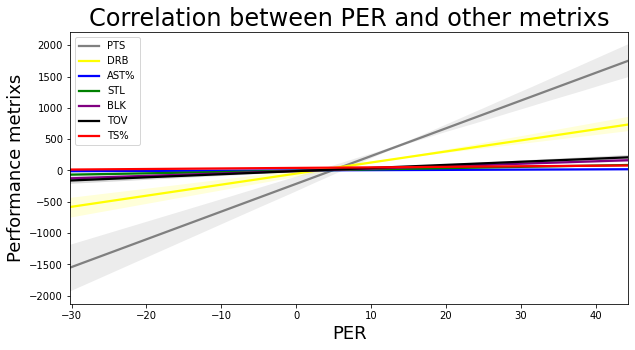

In [31]:
import seaborn as sns  # Show the regression line of PTS and other KPIs
PER = position_data["PER"]  # regression plot using seaborn
fig = plt.figure(figsize=(10, 5))
sns.regplot(x=PER, y=position_data["PTS"], color='grey', marker='+',scatter=False)
sns.regplot(x=PER, y=position_data["DRB"], color='yellow', marker='+',scatter=False)
sns.regplot(x=PER, y=position_data["AST%"], color='blue', marker='+',scatter=False)
sns.regplot(x=PER, y=position_data["STL"], color='green', marker='+',scatter=False)
sns.regplot(x=PER, y=position_data["BLK"], color='purple', marker='+',scatter=False)
sns.regplot(x=PER, y=position_data["TOV"], color='black', marker='+',scatter=False)
sns.regplot(x=PER, y=position_data["TS%"], color='red', marker='+',scatter=False)
plt.legend(labels=['PTS', 'DRB','AST%','STL','BLK','TOV','TS%']) # Legend, title and labels.
plt.title('Correlation between PER and other metrixs', size=24)
plt.xlabel('PER', size=18)
plt.ylabel('Performance metrixs', size=18);

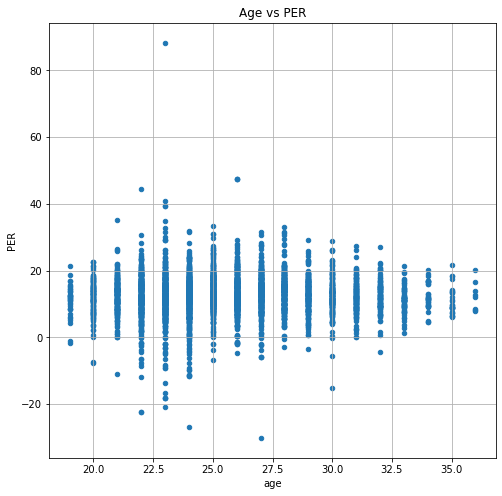

In [32]:
# Scatter plot
# Create a scatter plot which compares age to PER
player_matrix.plot(kind="scatter", x="age", y="PER", grid=True, figsize=(8,8),
              title="Age vs PER")
plt.show()

## *Normal test how to forcast or tell age range has the peak performance*

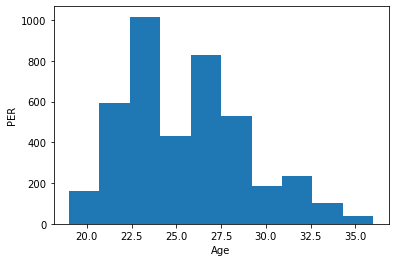

NormaltestResult(statistic=171.82862538033473, pvalue=4.874028700162454e-38)


In [33]:
import scipy.stats as sts
plt.hist(player_matrix["age"])

plt.xlabel('Age')
plt.ylabel('PER')
plt.show()
print(sts.normaltest(player_matrix["age"]))

# *Survivorship bias NBA vs Other leagues*
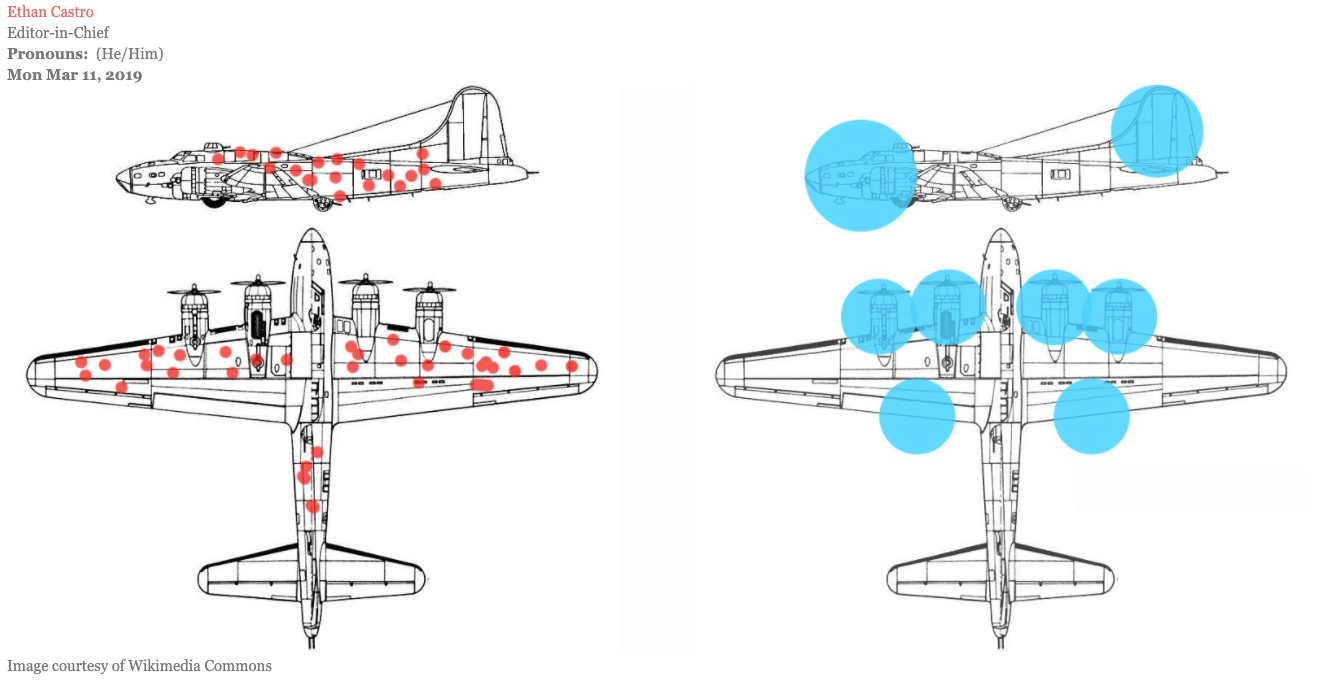